## 🌍 Life Expectancy Data Analysis and Insights
By Kopal Bajpayee

Exploring global health indicators to understand key drivers of life expectancy using Python and data visualization.

## 📌 Project Overview

This project analyzes a global dataset of life expectancy and health indicators from 2000 to 2015. The goal is to uncover factors influencing life expectancy across countries and highlight differences between developed and developing nations.

What I explored:
- Economic factors (GDP, health expenditure)
- Education (schooling years)
- Disease burdens (HIV/AIDS, measles, etc.)
- Nutrition and lifestyle factors

Finally, I built a regression model to quantify relationships between these factors and life expectancy.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Life Expectancy Data.csv")
df.head()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print("Rows, Columns:", df.shape)

Rows, Columns: (2938, 22)


In [4]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [5]:
df.columns = df.columns.str.strip()\
                       .str.replace(" ", "_")\
                       .str.replace("-", "_")\
                       .str.lower()
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [6]:
df.rename(columns={"thinness__1_19_years": "thinness_1_19_years"}, inplace=True)

In [7]:
df.columns.tolist()

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [8]:
df.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,10
adult_mortality,10
infant_deaths,0
alcohol,194
percentage_expenditure,0
hepatitis_b,553
measles,0


In [9]:
df["life_expectancy"] = df["life_expectancy"].fillna(df["life_expectancy"].median())
df["adult_mortality"] = df["adult_mortality"].fillna(df["adult_mortality"].median())
df["alcohol"] = df["alcohol"].fillna(df["alcohol"].median())

In [10]:
missing_countries = df.groupby("country")["gdp"].apply(lambda x: x.isnull().all())
countries_to_drop = missing_countries[missing_countries].index.tolist()

print("Dropping countries:", countries_to_drop)

Dropping countries: ['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', 'Cook Islands', 'Czechia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Iran (Islamic Republic of)', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Monaco', 'Niue', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Slovakia', 'The former Yugoslav republic of Macedonia', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']


In [11]:
df = df[~df["country"].isin(countries_to_drop)]

In [12]:
df["population"] = df.groupby("status")["population"].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipython-input-12-3802859434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["population"] = df.groupby("status")["population"].transform(


In [13]:
df.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percentage_expenditure,0
hepatitis_b,498
measles,0


In [14]:
df["hepatitis_b"] = df["hepatitis_b"].fillna(df["hepatitis_b"].median())
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
df["gdp"] = df["gdp"].fillna(df["gdp"].median())
df["thinness_5_9_years"] = df["thinness_5_9_years"].fillna(df["thinness_5_9_years"].median())
df["thinness_1_19_years"] = df["thinness_1_19_years"].fillna(df["thinness_1_19_years"].median())
df["diphtheria"] = df["diphtheria"].fillna(df["diphtheria"].median())
df["polio"] = df["polio"].fillna(df["polio"].median())
df["schooling"] = df["schooling"].fillna(df["schooling"].median())
df["income_composition_of_resources"] = df["income_composition_of_resources"].fillna(df["income_composition_of_resources"].median())

/tmp/ipython-input-14-2487879213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hepatitis_b"] = df["hepatitis_b"].fillna(df["hepatitis_b"].median())
/tmp/ipython-input-14-2487879213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi"] = df["bmi"].fillna(df["bmi"].median())
/tmp/ipython-input-14-2487879213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [15]:
df = df.drop("total_expenditure", axis=1)

In [16]:
df.isna().sum()

,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percentage_expenditure,0
hepatitis_b,0
measles,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2533 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2533 non-null   object 
 1   year                             2533 non-null   int64  
 2   status                           2533 non-null   object 
 3   life_expectancy                  2533 non-null   float64
 4   adult_mortality                  2533 non-null   float64
 5   infant_deaths                    2533 non-null   int64  
 6   alcohol                          2533 non-null   float64
 7   percentage_expenditure           2533 non-null   float64
 8   hepatitis_b                      2533 non-null   float64
 9   measles                          2533 non-null   int64  
 10  bmi                              2533 non-null   float64
 11  under_five_deaths                2533 non-null   int64  
 12  polio                    

In [63]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2.533000e+03,2533.000000,2533.000000,2533.000000,2533.000000
mean,2007.510857,69.229175,163.504935,31.172917,4.470130,856.289896,82.908804,2345.782471,38.397789,43.379392,82.193052,82.149625,1.871536,7386.120543,1.164375e+07,4.840584,4.878287,0.629321,12.027319
std,4.612597,9.685362,126.497587,125.490350,3.896689,2117.260468,22.893996,11004.080010,19.887185,170.629726,23.661637,23.792616,5.393229,14167.742182,5.805811e+07,4.451021,4.541365,0.214285,3.452371
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.000000,71.000000,0.000000,0.950000,22.097580,82.000000,0.000000,19.300000,0.000000,77.000000,78.000000,0.100000,473.453380,2.793590e+05,1.600000,1.600000,0.491000,10.100000
50%,2008.000000,72.100000,139.000000,3.000000,3.755000,110.980306,92.000000,15.000000,43.800000,3.000000,93.000000,92.000000,0.100000,1766.947595,1.404827e+06,3.400000,3.300000,0.682000,12.400000
75%,2012.000000,75.800000,227.000000,21.000000,7.280000,561.916864,96.000000,357.000000,56.100000,26.000000,97.000000,97.000000,0.800000,5828.745662,6.233948e+06,7.100000,7.100000,0.785000,14.400000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 🧹 Data Cleaning Summary

- Standardized column names for consistency.
- Checked and handled missing values:
  - Filled missing numeric values with medians (sometimes grouped by country status).
  - Dropped countries with entirely missing GDP data.
- Dropped the `total_expenditure` column due to redundancy.
- Verified no missing values remained after cleaning.


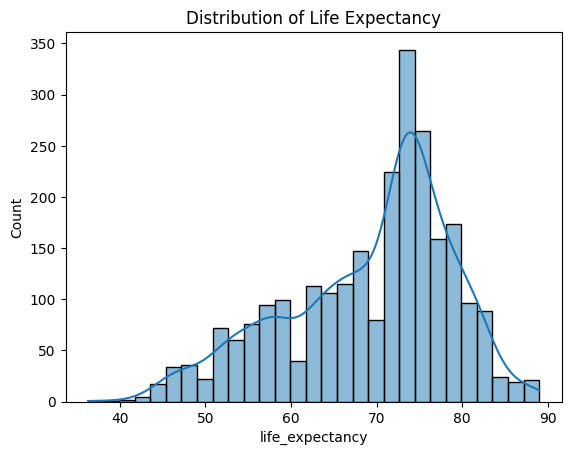

In [19]:
sns.histplot(df["life_expectancy"], kde=True)
plt.title("Distribution of Life Expectancy")
plt.show()

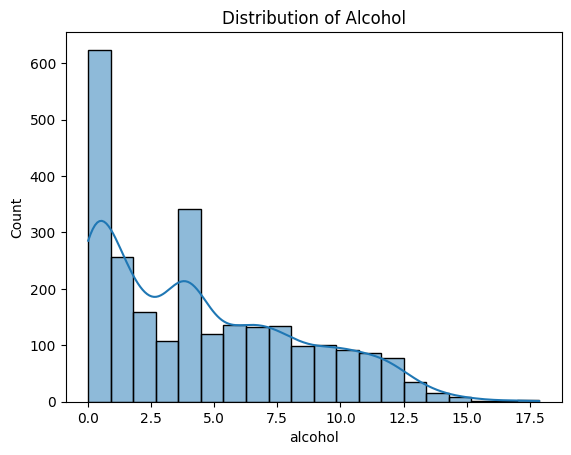

In [22]:
sns.histplot(df["alcohol"], kde=True)
plt.title("Distribution of Alcohol")
plt.show()

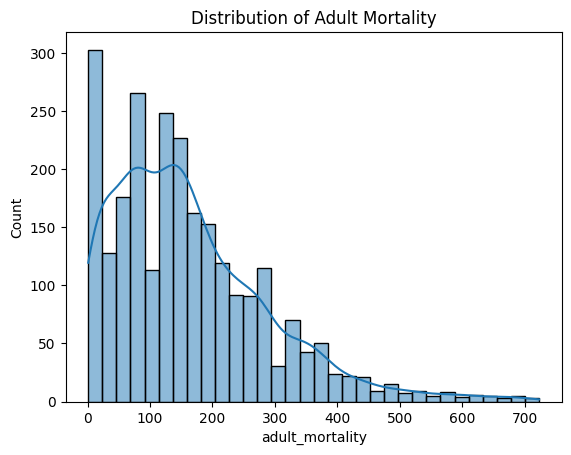

In [23]:
sns.histplot(df["adult_mortality"], kde=True)
plt.title("Distribution of Adult Mortality")
plt.show()

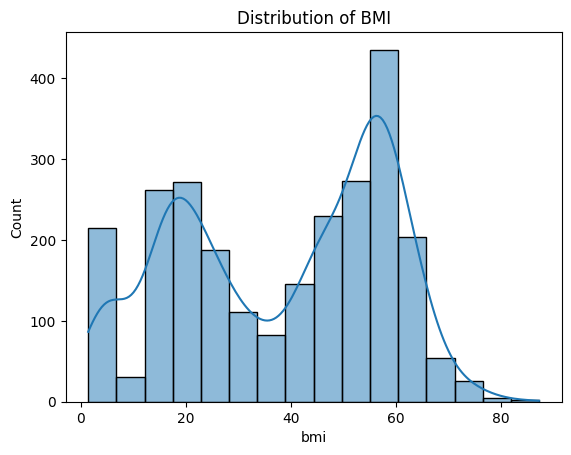

In [28]:
sns.histplot(df["bmi"], kde=True)
plt.title("Distribution of BMI")
plt.show()

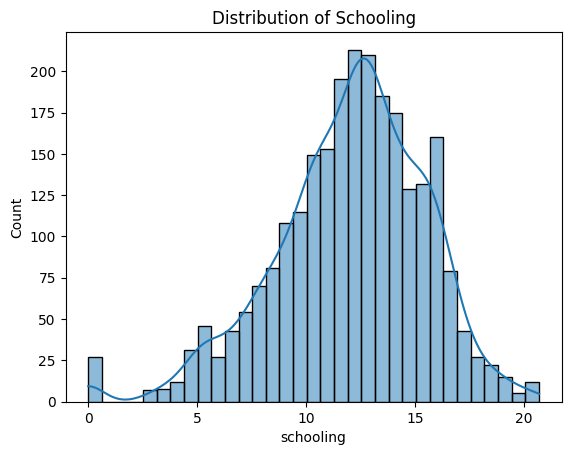

In [61]:
sns.histplot(df["schooling"], kde=True)
plt.title("Distribution of Schooling")
plt.show()

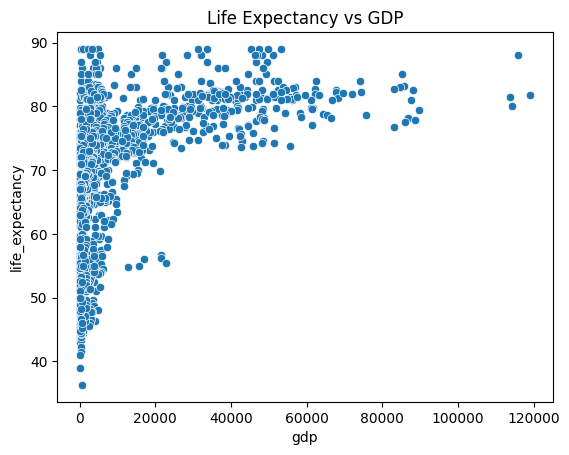

In [33]:
sns.scatterplot(x="gdp", y="life_expectancy", data=df)
plt.title("Life Expectancy vs GDP")
plt.show()

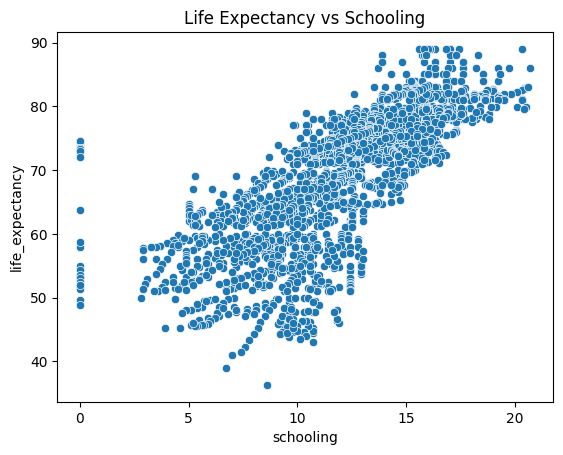

In [34]:
sns.scatterplot(x="schooling", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Schooling")
plt.show()

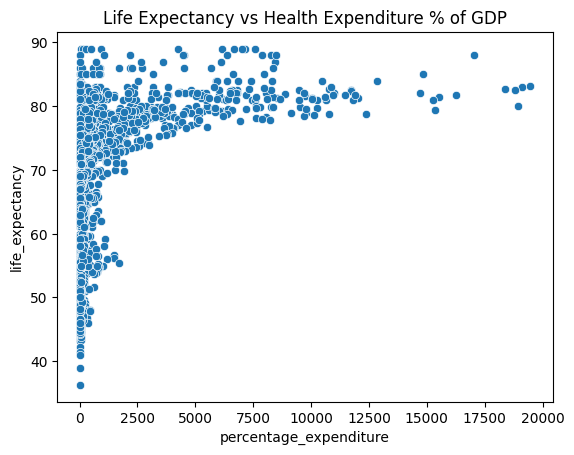

In [35]:
sns.scatterplot(x="percentage_expenditure", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Health Expenditure % of GDP")
plt.show()

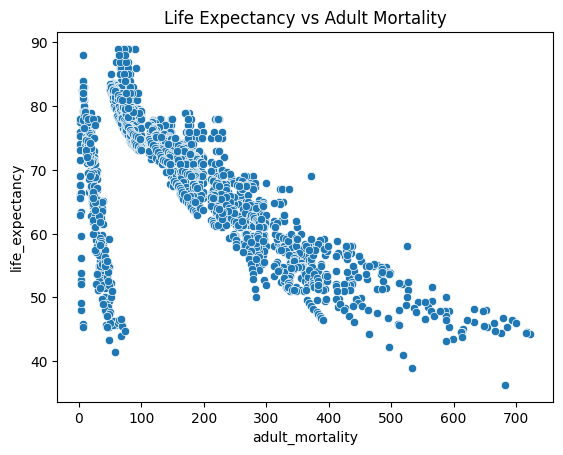

In [36]:
sns.scatterplot(x="adult_mortality", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Adult Mortality")
plt.show()

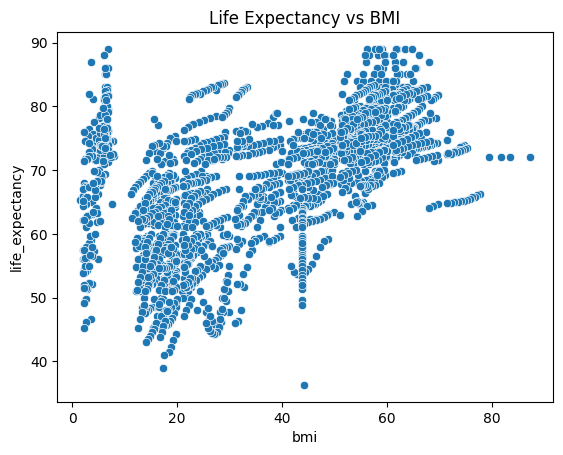

In [37]:
sns.scatterplot(x="bmi", y="life_expectancy", data=df)
plt.title("Life Expectancy vs BMI")
plt.show()

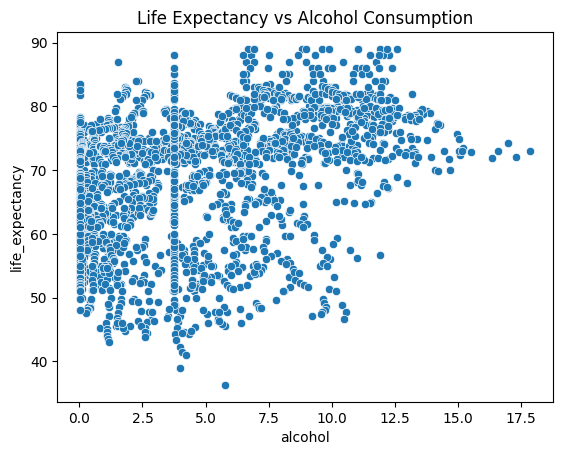

In [38]:
sns.scatterplot(x="alcohol", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Alcohol Consumption")
plt.show()

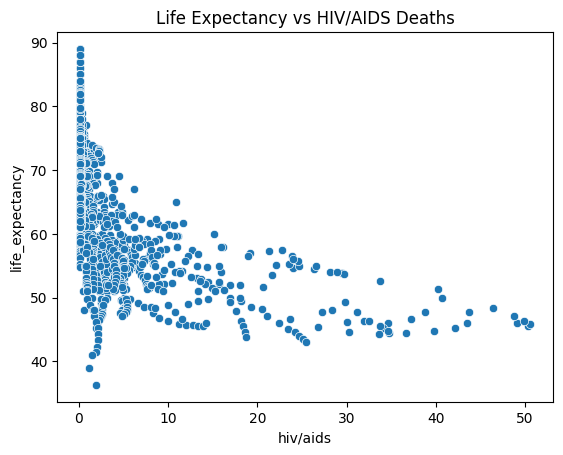

In [64]:
sns.scatterplot(x="hiv/aids", y="life_expectancy", data=df)
plt.title("Life Expectancy vs HIV/AIDS Deaths")
plt.show()

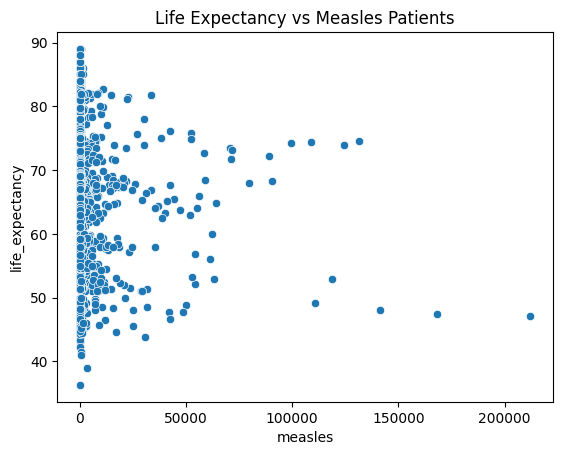

In [40]:
sns.scatterplot(x="measles", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Measles Patients")
plt.show()

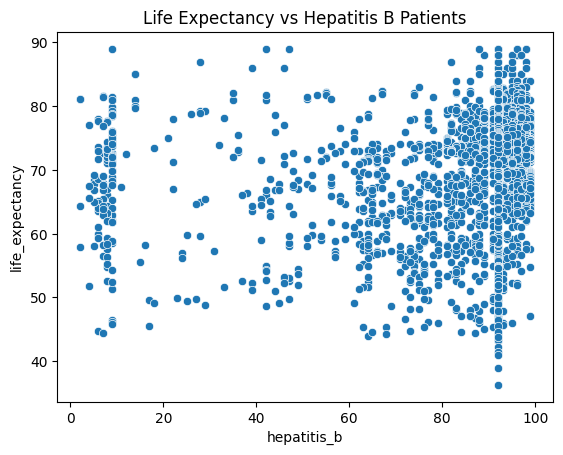

In [41]:
sns.scatterplot(x="hepatitis_b", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Hepatitis B Patients")
plt.show()

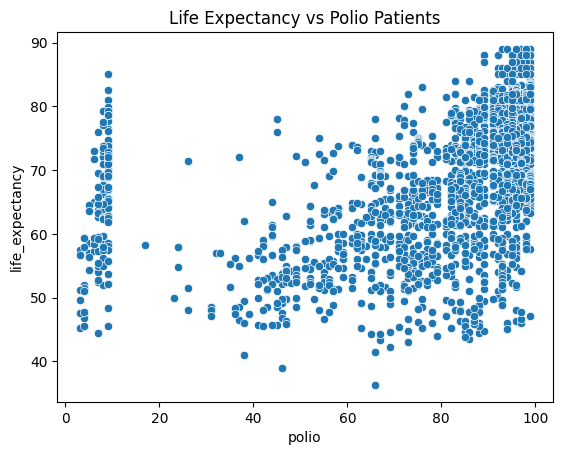

In [43]:
sns.scatterplot(x="polio", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Polio Patients")
plt.show()

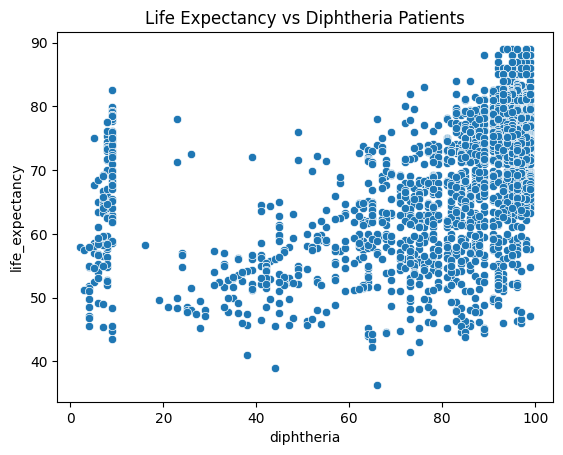

In [44]:
sns.scatterplot(x="diphtheria", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Diphtheria Patients")
plt.show()

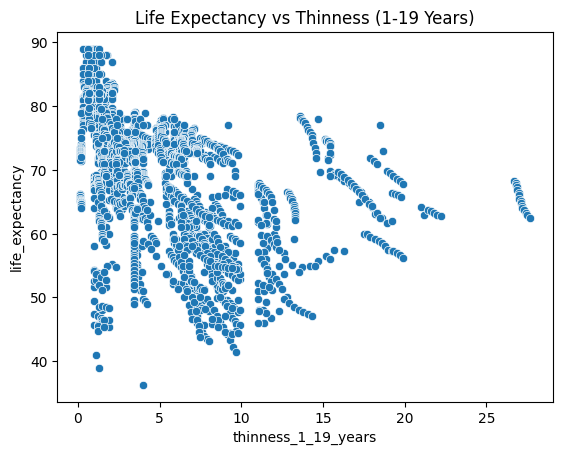

In [62]:
sns.scatterplot(x="thinness_1_19_years", y="life_expectancy", data=df)
plt.title("Life Expectancy vs Thinness (1-19 Years)")
plt.show()

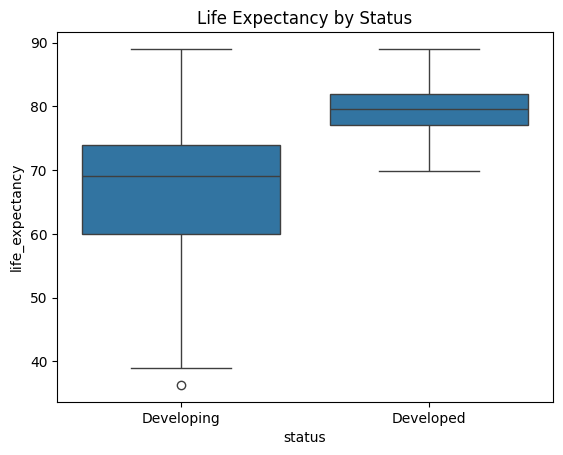

In [45]:
sns.boxplot(x="status", y="life_expectancy", data=df)
plt.title("Life Expectancy by Status")
plt.show()

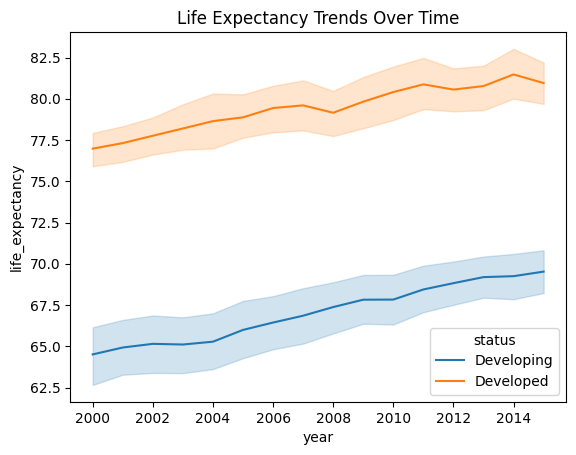

In [46]:
sns.lineplot(x="year", y="life_expectancy", hue="status", data=df, estimator="mean")
plt.title("Life Expectancy Trends Over Time")
plt.show()

In [54]:
df.groupby("status")["life_expectancy"].mean()

,life_expectancy
status,
Developed,79.427009
Developing,67.037986


In [55]:
df.groupby("status")["gdp"].mean()

,gdp
status,
Developed,22053.386446
Developing,4234.592905


In [57]:
df.groupby("status")["alcohol"].mean()

,alcohol
status,
Developed,9.354319
Developing,3.420674


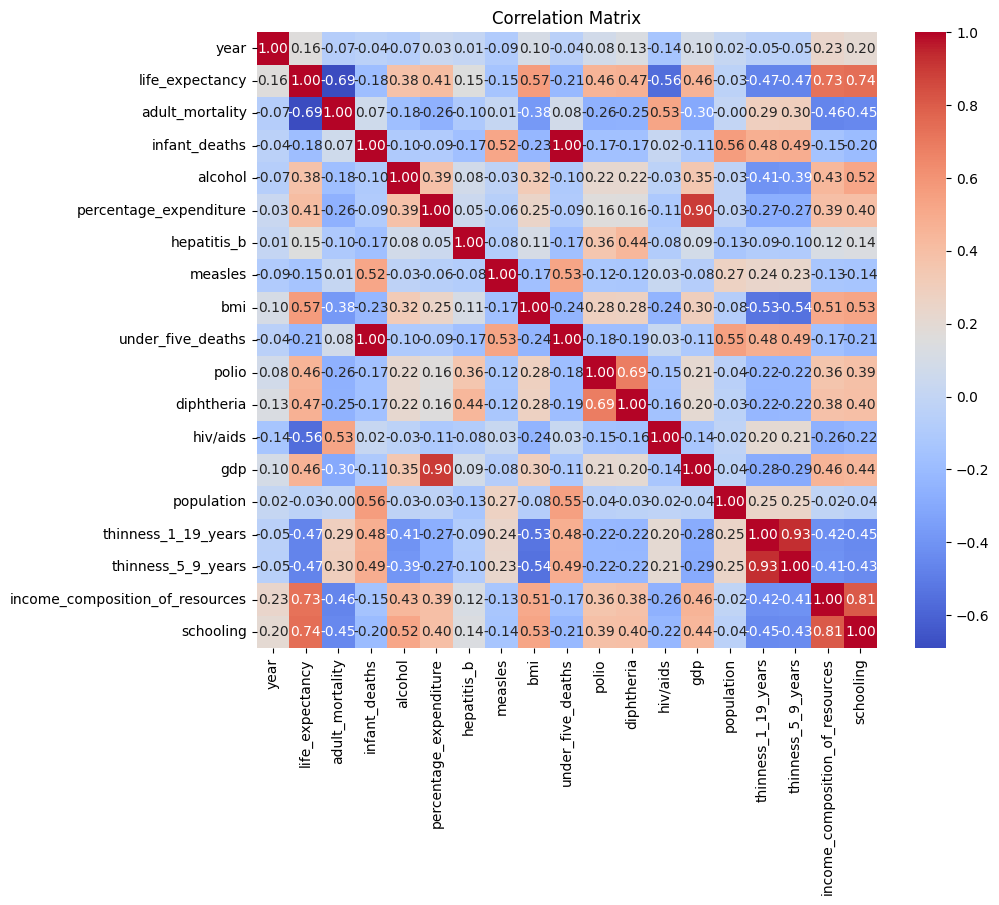

In [58]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 🔎 Key Insights from EDA

- **Schooling** shows the strongest positive correlation (~0.74) with life expectancy.
- **GDP** moderately correlates with life expectancy in a positive manner.
- **Adult mortality** and **HIV/AIDS deaths** have strong negative impacts on life expectancy.
- Developing nations have lower life expectancy, averaging ~10 years less than developed countries.
- Life expectancy improved globally between 2000 and 2015, with steeper gains in developing nations.


In [60]:
from sklearn.linear_model import LinearRegression

features = ["schooling", "gdp", "adult_mortality", "bmi"]
X = df[features]
y = df["life_expectancy"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 56.33455120546506
Coefficients: [ 1.21097685e+00  6.94187868e-05 -3.12052753e-02  7.60277969e-02]


## 📈 Regression Analysis

A linear regression was built to quantify the impact of several factors on life expectancy:

- **Intercept**: 56.33
- **Schooling**: +1.21 years per additional year of education
- **GDP**: Small positive effect (+0.069 years per $1000 GDP increase)
- **Adult mortality**: Reduces life expectancy (-0.031 years per additional death per 1000 people)
- **BMI**: Slight positive effect (+0.076 years per unit increase)

**Conclusion:** Education has the most significant positive effect, while adult mortality strongly reduces life expectancy. Economic factors help but plateau after certain income levels.


## ✅ Project Conclusion

This analysis reveals the strong influence of education, economic development, and health infrastructure on life expectancy worldwide. Key takeaways include:

- Education is the most significant driver of longer life spans.
- Economic growth improves life expectancy, but gains diminish beyond certain income levels.
- Disease burdens and adult mortality significantly lower life expectancy.

This project demonstrates how data analysis and Python can extract meaningful insights from global health data.

**Next steps:** Future work could explore advanced predictive models or regional differences in greater detail.
